## 데이터 불러오기

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline


In [44]:
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [45]:
df = pd.read_csv('C:/Users/sbpark/20210318회귀모형을위한재구매데이터_상품추가.csv')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139976 entries, 0 to 139975
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   OWNER               139976 non-null  object 
 1   DATE_AVG_CAL        139976 non-null  float64
 2   TOTAL_ORDER_COUNT   139976 non-null  int64  
 3   PNAME               139976 non-null  object 
 4   TOTAL_PAY           139976 non-null  int64  
 5   JOB_FINAL           139976 non-null  object 
 6   TOTAL_REVIEW_COUNT  13907 non-null   float64
 7   TOTAL_REVIEW_AVG    13907 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 8.5+ MB


In [47]:
pd.options.display.float_format = '{:.2f}'.format

In [48]:
df.describe()

,DATE_AVG_CAL,TOTAL_ORDER_COUNT,TOTAL_PAY,TOTAL_REVIEW_COUNT,TOTAL_REVIEW_AVG
count,139976.00,139976.00,139976.00,13907.00,13907.00
mean,93.27,6.56,144380.07,2.52,4.59
std,127.91,10.42,310427.38,3.36,0.74
min,0.00,2.00,0.00,1.00,1.00
25%,16.48,2.00,38800.00,1.00,4.00
50%,47.39,3.00,73200.00,1.00,5.00
75%,115.84,7.00,150000.00,3.00,5.00
max,1152.68,508.00,31075600.00,77.00,5.00


In [49]:
df

,OWNER,DATE_AVG_CAL,TOTAL_ORDER_COUNT,PNAME,TOTAL_PAY,JOB_FINAL,TOTAL_REVIEW_COUNT,TOTAL_REVIEW_AVG
0,alsdlxn@hanmail.net,48.76,2,현수막,51000,음식점업,1.00,4.00
1,kingai69@daum.net,2.01,2,명함,24000,카페/음료/베이커리,1.00,3.00
2,1803131734358aaf3a0aed46e8b0e5,34.06,3,배너,90700,부동산/임대/건설/숙박업,1.00,4.00
3,eb936b3e1c2a412aa793,10.67,95,현수막,1946400,예술/스포츠/레저/여가,59.00,4.14
4,89b46cb90c3a4160be15,29.77,25,명함,280100,교육서비스업,9.00,5.00
...,...,...,...,...,...,...,...,...
139971,19092713360b5dc45dcf46440fb42f,56.39,9,전단지,343430,음식점업,nan,nan
139972,71ff168c08414da6a21b,49.45,14,리플렛,460470,예술/스포츠/레저/여가,nan,nan
139973,2007231239cdef52c5b30345bc9ef9,154.16,2,현수막,38000,업종미선택,nan,nan
139974,1902171226a0ac9f3c70ac423494f1,3.89,3,현수막,53700,업종미선택,nan,nan


<AxesSubplot:>

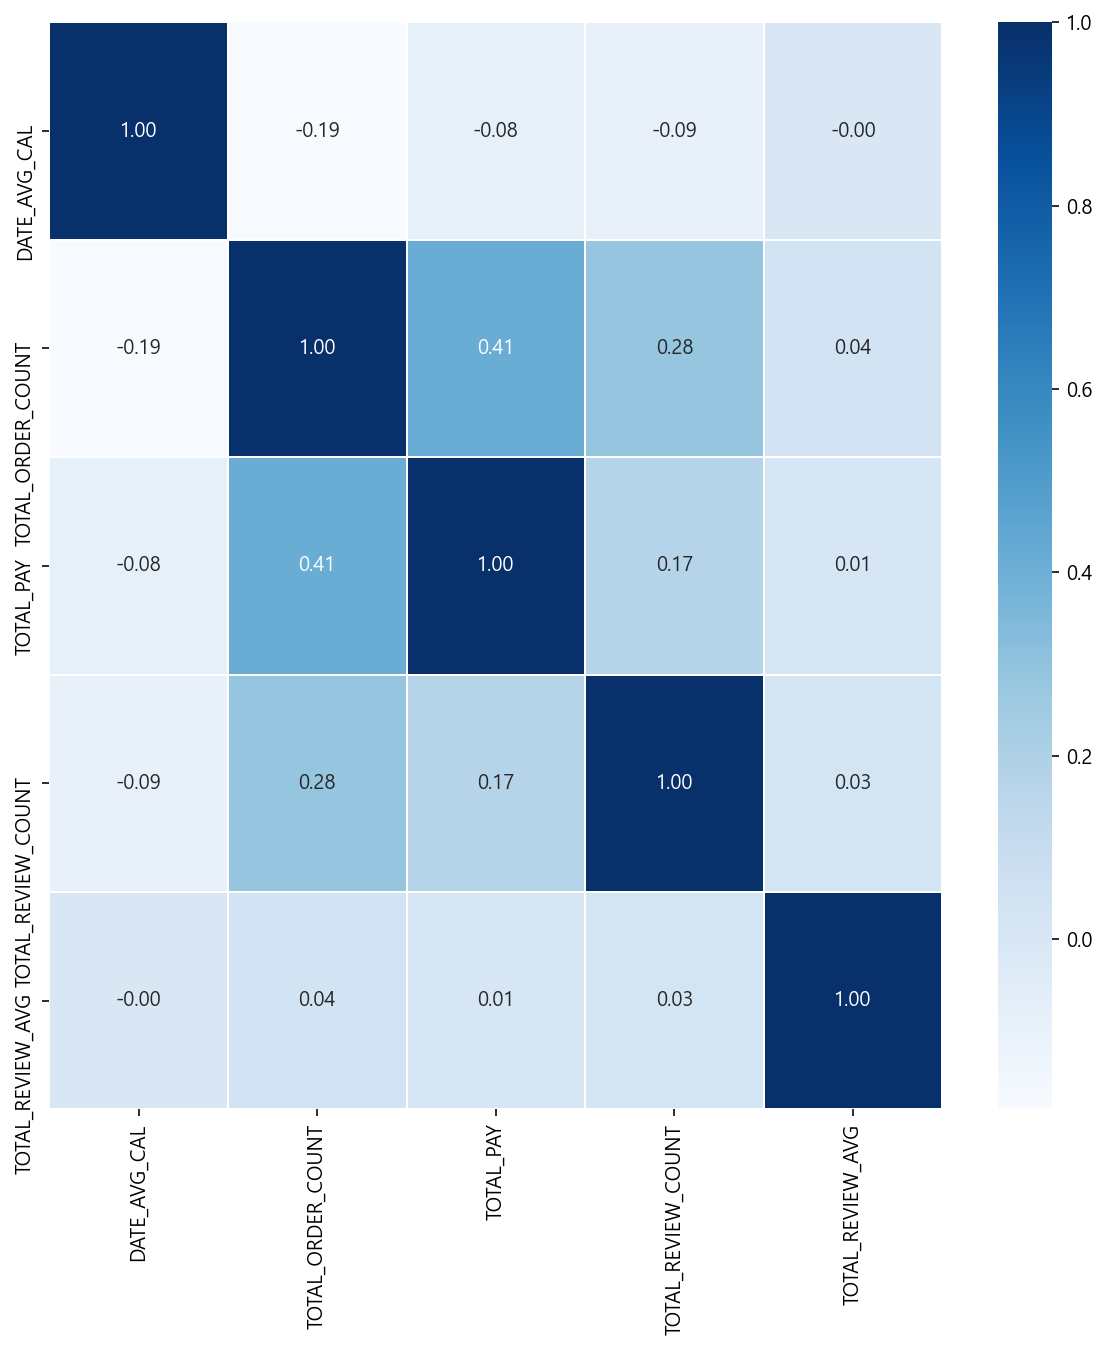

In [50]:
#상관관계를 확인해보기
plt.figure(figsize=(10,10))
sns.heatmap(data = df.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

## 데이터 전처리

### 데이터 확인 

#### 지정된 이상치 제거

C:\Users\sbpark\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DATE_AVG_CAL', ylabel='Density'>

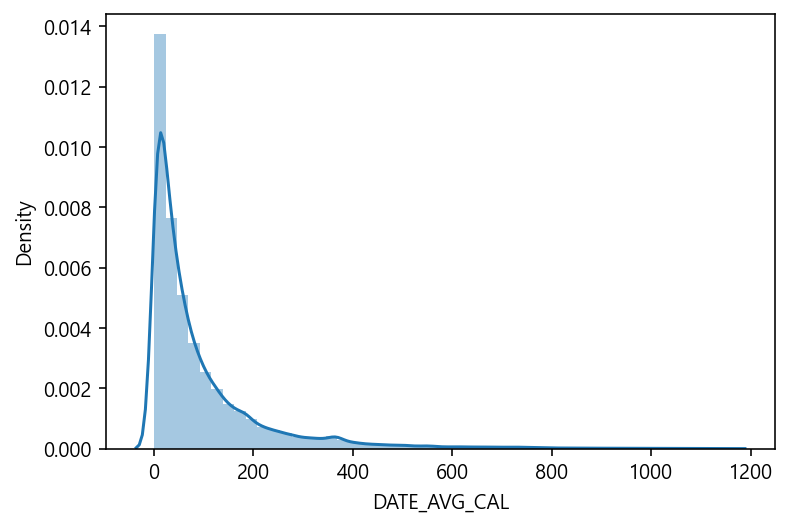

In [51]:
sns.distplot(df['DATE_AVG_CAL']) # 지나치게 한쪽으로 치우친 데이터 > 7일미만, 180일 초과 데이터는 우선 결측치로 처리해 제외할것

In [52]:
df_use = df[~((df['DATE_AVG_CAL'] < 7) | (df['DATE_AVG_CAL'] > 180))].copy()

In [53]:
df_use.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100511 entries, 0 to 139973
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   OWNER               100511 non-null  object 
 1   DATE_AVG_CAL        100511 non-null  float64
 2   TOTAL_ORDER_COUNT   100511 non-null  int64  
 3   PNAME               100511 non-null  object 
 4   TOTAL_PAY           100511 non-null  int64  
 5   JOB_FINAL           100511 non-null  object 
 6   TOTAL_REVIEW_COUNT  11220 non-null   float64
 7   TOTAL_REVIEW_AVG    11220 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 6.9+ MB


In [54]:
df_use.describe()

,DATE_AVG_CAL,TOTAL_ORDER_COUNT,TOTAL_PAY,TOTAL_REVIEW_COUNT,TOTAL_REVIEW_AVG
count,100511.00,100511.00,100511.00,11220.00,11220.00
mean,59.19,7.23,160872.26,2.62,4.60
std,44.52,8.81,311806.19,3.37,0.73
min,7.00,2.00,0.00,1.00,1.00
25%,22.70,2.00,43600.00,1.00,4.14
50%,46.06,4.00,84400.00,1.00,5.00
75%,86.26,8.00,171400.00,3.00,5.00
max,180.00,136.00,31075600.00,76.00,5.00


#### 비용데이터 이상한 것 제거

In [55]:
#금액이 0으로 나오는 사람들 3명 제거
df_use = df_use[~(df_use['TOTAL_PAY'] == 0)]

In [56]:
df_use.describe()

,DATE_AVG_CAL,TOTAL_ORDER_COUNT,TOTAL_PAY,TOTAL_REVIEW_COUNT,TOTAL_REVIEW_AVG
count,100508.00,100508.00,100508.00,11220.00,11220.00
mean,59.19,7.23,160877.07,2.62,4.60
std,44.52,8.81,311809.60,3.37,0.73
min,7.00,2.00,800.00,1.00,1.00
25%,22.70,2.00,43600.00,1.00,4.14
50%,46.06,4.00,84400.00,1.00,5.00
75%,86.26,8.00,171400.00,3.00,5.00
max,180.00,136.00,31075600.00,76.00,5.00


#### 리뷰데이터 처리

In [57]:
# TOTAL_REVIEW_COUNT null 값에 리뷰율 10%를 적용하되 반내림한다.
df_use.loc[df_use['TOTAL_REVIEW_COUNT'].isnull() == True,'TOTAL_REVIEW_COUNT'] = np.floor(df_use['TOTAL_ORDER_COUNT']*0.1)
df_use.loc[df_use['TOTAL_REVIEW_COUNT'] < 1,'TOTAL_REVIEW_COUNT'] = 0

In [58]:
# TOTAL_REVIEW_AVG null 값에 중앙값 5를 적용하되, 만약 TOTAL_REVIEW_COUNT가 0인 경우 0으로 대체한다

df_use.loc[df_use['TOTAL_REVIEW_AVG'].isnull() == True,'TOTAL_REVIEW_AVG'] =5
df_use.loc[df_use['TOTAL_REVIEW_COUNT'] < 1,'TOTAL_REVIEW_AVG'] = 0 

In [59]:
df_use.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100508 entries, 0 to 139973
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   OWNER               100508 non-null  object 
 1   DATE_AVG_CAL        100508 non-null  float64
 2   TOTAL_ORDER_COUNT   100508 non-null  int64  
 3   PNAME               100508 non-null  object 
 4   TOTAL_PAY           100508 non-null  int64  
 5   JOB_FINAL           100508 non-null  object 
 6   TOTAL_REVIEW_COUNT  100508 non-null  float64
 7   TOTAL_REVIEW_AVG    100508 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 9.4+ MB


<AxesSubplot:>

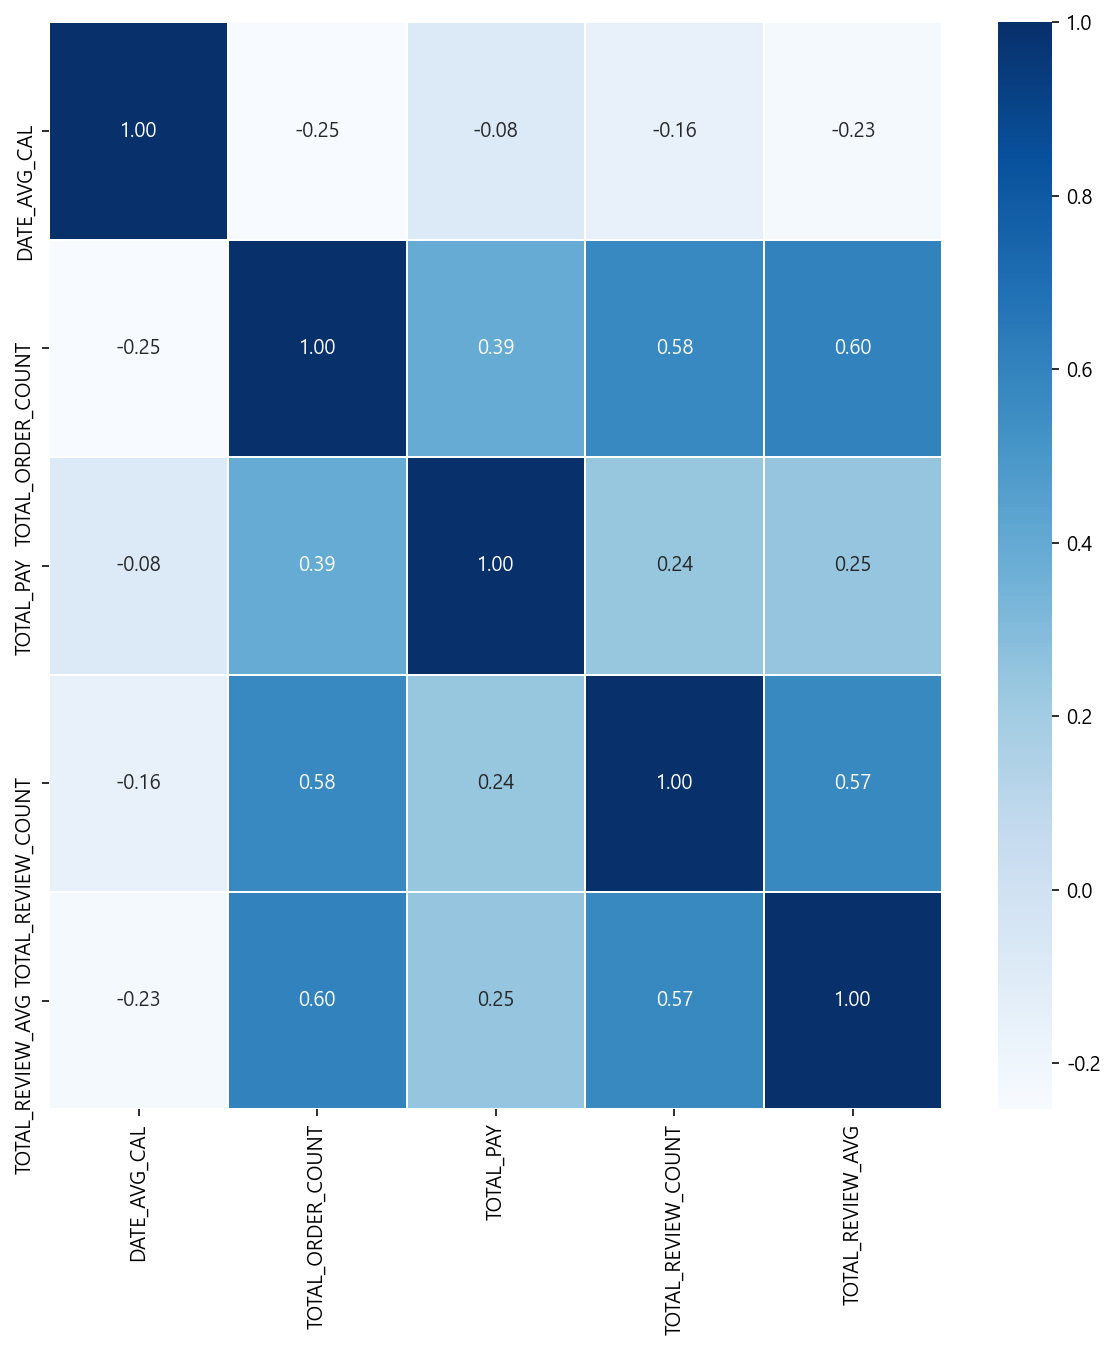

In [60]:
#상관관계를 다시 확인해보기
plt.figure(figsize=(10,10))
sns.heatmap(data = df_use.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

#### 레이블 인코딩 > pname, job_final 모두 진행해야 함

In [61]:
#직업 인코딩
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df_use['JOB_FINAL'])
labels = encoder.transform(df_use['JOB_FINAL'])

df_use['JOB_FINAL_LABELS'] = labels

In [62]:
#구매상품 인코딩
encoder.fit(df_use['PNAME'])
labels = encoder.transform(df_use['PNAME'])

df_use['PNAME_LABELS'] = labels

In [63]:
df_use = df_use.drop(['OWNER','JOB_FINAL','PNAME'], axis = 1)

In [65]:
df_use

,DATE_AVG_CAL,TOTAL_ORDER_COUNT,TOTAL_PAY,TOTAL_REVIEW_COUNT,TOTAL_REVIEW_AVG,JOB_FINAL_LABELS,PNAME_LABELS
0,48.76,2,51000,1.00,4.00,11,25
2,34.06,3,90700,1.00,4.00,8,9
3,10.67,95,1946400,59.00,4.14,10,25
4,29.77,25,280100,9.00,5.00,1,8
5,19.61,2,11300,1.00,5.00,13,13
...,...,...,...,...,...,...,...
139967,46.74,9,142300,0.00,0.00,9,15
139969,158.31,2,57700,0.00,0.00,0,9
139971,56.39,9,343430,0.00,0.00,11,19
139972,49.45,14,460470,1.00,5.00,10,7


<AxesSubplot:>

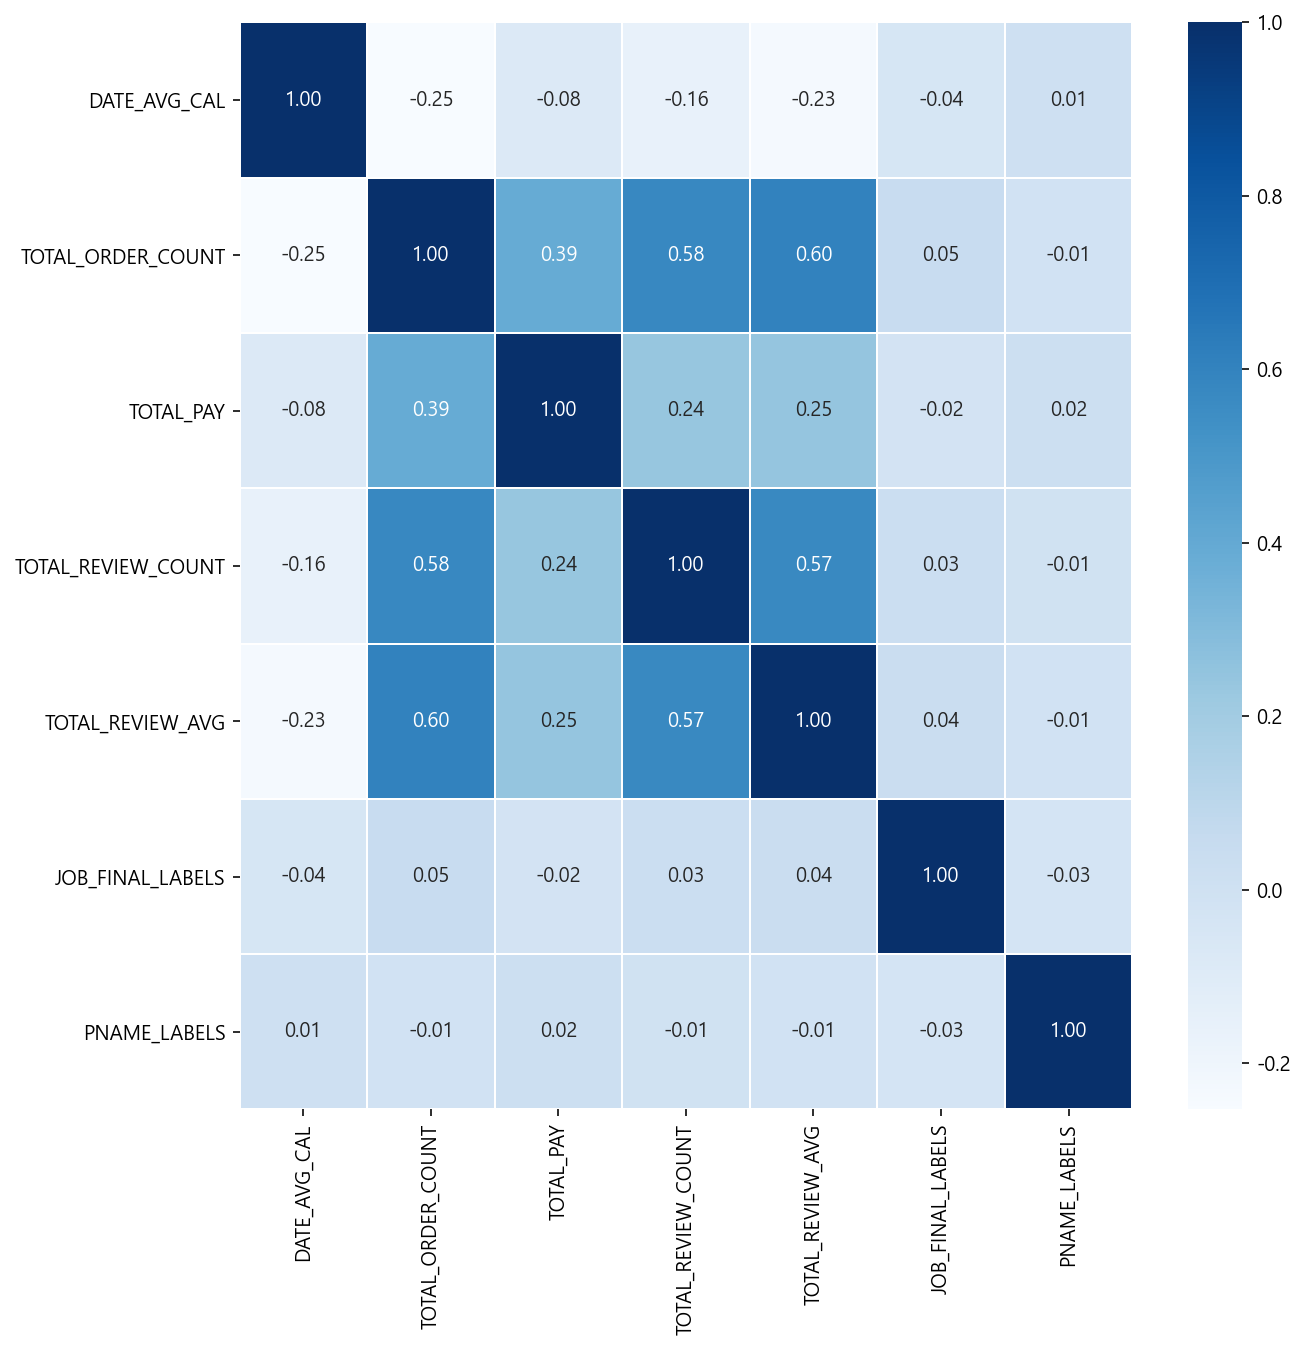

In [64]:
#상관관계를 다시 확인해보기
plt.figure(figsize=(10,10))
sns.heatmap(data = df_use.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

### decisiontree reg 모델 적용

들어가기 전 : 트리 기반의 회귀모델은 훈련 데이터 범위 밖의 포인트를 예측할 수 없다. 또한 과적합이 발생할 수 있으니 주의해야 함

In [66]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

def evaluate_regr(y, pred):
    rmse_val = rmse(y, pred)
    mae_val = mean_absolute_error(y, pred)
    print("RMSE : {0:.3f},  MAE : {1:.4f}".format(rmse_val,mae_val))

In [67]:
from sklearn.model_selection import train_test_split, GridSearchCV

y_target = df_use['DATE_AVG_CAL']
X_feature = df_use.drop(['DATE_AVG_CAL'], axis = 1)



X_train, X_test, y_train, y_test = train_test_split(X_feature, y_target, test_size = 0.3, random_state = 0)

dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train,y_train )
pred = dt_reg.predict(X_test)



evaluate_regr(y_test, pred)

RMSE : 57.386,  MAE : 43.3603


#### 교차검증

In [93]:
from sklearn.model_selection import cross_val_score, cross_validate

# 각 폴드의 스코어 
neg_mse_scores = cross_val_score(dt_reg, X_feature, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 교차 검증의 개별 Negative MSE scores:  [-3056.83 -3318.31 -3311.71 -3391.18 -3339.22]
 5 교차 검증의 개별 RMSE scores :  [55.29 57.6  57.55 58.23 57.79]
 5 교차 검증의 평균 RMSE : 57.292 


### 하이퍼파라미터 최적화

In [95]:
param_grid = {'criterion':['mse'], 
              'max_depth':[10,20,30] , 
              'min_samples_split' : [50,100,150]
             }
grid = GridSearchCV(dt_reg, param_grid=param_grid) 

grid.fit(X_train, y_train)

print(np.sqrt(grid.best_score_))
print(grid.best_params_)
df_hyper = pd.DataFrame(grid.cv_results_)



0.3316030140101166
{'criterion': 'mse', 'max_depth': 10, 'min_samples_split': 150}


In [96]:
dt_reg = DecisionTreeRegressor(max_depth = 10,min_samples_split = 150 )
dt_reg.fit(X_train,y_train )
pred = dt_reg.predict(X_test)


### 그래프 그리기

In [97]:
from sklearn.tree import export_graphviz
import graphviz


export_graphviz(dt_reg, out_file = "reorder.dot", class_names = df_use.iloc[:,:1].columns , feature_names = df_use.iloc[:,1:].columns , impurity= True, filled = True)

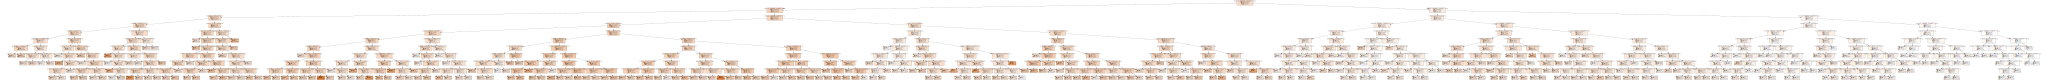

In [98]:
with open("reorder.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [99]:
dot = graphviz.Source(dot_graph)
dot.render(filename = 'tree.png')

'tree.png.pdf'